<center><h1>SB Ads</h1></center>

# 0. Set-Up


The necessary modules are imported.

In [ ]:
#! pip install scikit-learn

In [ ]:
import pandas as pd
import numpy as np
import os
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/SuperBowl_Project_FUB/Colab_Notebooks/Fla_ML_Model/End_Datei.xlsx'
data = pd.read_excel(data_path)

# 1. Business Understanding

## 1.1	Domain Knowledge

Super Bowl ads have become an iconic cultural phenomenon, known for their creativity, high production value, and the ability to capture the attention of millions of viewers during the prestigious sporting event.

Every year, following the Super Bowl, these ads are assessed based on various criteria, proving crucial for marketing researchers who analyze brand perception, resulting brand popularity, purchase intent, and the attributes that characterize a brand or product.

## 1.2	Project Goal

The goal of this project is to identify the columns the values of which are differentiate the best rated ads and the rest of them.

# 2. Data Understanding

## 2.1	Project Structure



In this project, a dataset has been utilized that comprises details regarding Super Bowl advertisements spanning from 2013 to 2022. This file includes meta-attributes, data on video complexity, as well as manually coded attributes provided, along with attributes generated through the analysis of visuals and audio in commercials.

## 2.2	Fields Understanding

We firstly decided to look at the structure of the given data.

In [ ]:
data.shape

(550, 494)

In [ ]:
data.head()

,AdNumber,Sponsor,BRAND,AdTitle,AdNumber.1,iSpot.tv,Comment,Length,Quarter,USATodayAdMeter,...,Total_Speaking_Time_Seconds,Total_Speaking_Time_Percent,Male_Speaking_Time_Seconds,Male_Speaking_Time_Percent,Female_Speaking_Time_Seconds,Female_Speaking_Time_Percent,Emotion_from_Dialogue,Acoustic_Complexity_Index__main_value,RMS_energy__mean,compression_ratio_per_second
0,AD0252,Audi,Audi,Prom,AD0252,x,NaN,60,1,6.64,...,13.056027,21.346283,11.222411,85.955787,1.833616,14.044213,joy,2208.604983,0.014519,1.430401
1,AD0253,Axe,Axe,Lifeguard,AD0253,x,NaN,30,3,4.33,...,6.061121,21.045557,6.061121,100.000000,0.000000,0.000000,joy,982.091066,0.021984,3.037449
2,AD0254,Best Buy,BestBuy,Asking Amy Poehler,AD0254,x,NaN,30,1,6.23,...,24.312394,85.495636,21.120543,86.871508,3.191851,13.128492,fear,1039.901785,0.017015,3.076135
3,AD0255,Blackberry,BlackBerry,My new Blackberry,AD0255,x,NaN,30,3,5.16,...,14.617997,51.097583,14.617997,100.000000,0.000000,0.000000,joy,1029.012771,0.019414,3.057829
4,AD0256,Budweiser,Beck's Beer,Beck's Sapphire fish singing,AD0256,x,BRAND = Becks ?,30,3,3.66,...,9.066214,32.049682,9.015280,99.438202,0.050934,0.561798,joy,1006.312035,0.017803,3.092287


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Columns: 494 entries, AdNumber to compression_ratio_per_second
dtypes: float64(422), int64(59), object(13)
memory usage: 2.1+ MB


## 2.3	Data Quality

### 2.3.1 Complete Attribute Values

This step refers to the absence of missing or null values within a specific
attribute or column of a dataset.

In [ ]:
data.isnull().sum()

AdNumber                                  0
Sponsor                                   0
BRAND                                     0
AdTitle                                   0
AdNumber.1                                0
                                         ..
Female_Speaking_Time_Percent             16
Emotion_from_Dialogue                    16
Acoustic_Complexity_Index__main_value    16
RMS_energy__mean                         16
compression_ratio_per_second             16
Length: 494, dtype: int64

### 2.3.2 Complete Records ### CHANGE BC Non Sense

record_completeness refers to the absence of missing or null values across all attributes or columns within a single record or observation.

In [ ]:
record_completeness = data.isnull().any(axis=1).sum()
print("Number of Incomplete Records:", record_completeness)

Number of Incomplete Records: 550


### 2.3.3 Unbalanced data

In [ ]:
data['Kelloggs'] = data['Kelloggs'].str.upper()

kellogs_rating = data['Kelloggs'].value_counts().reset_index()
kellogs_rating.columns = ['Kellogs Rating', 'Count']
kellogs_rating = kellogs_rating.sort_values(by='Count', ascending=False)
kellogs_rating['Percentage'] = (kellogs_rating['Count'] / kellogs_rating['Count'].sum()) * 100

kellogs_rating

,Kellogs Rating,Count,Percentage
0,C,198,36.000000
1,B,173,31.454545
2,A,85,15.454545
3,D,68,12.363636
4,-,19,3.454545
5,F,7,1.272727


In [ ]:
# Define a function to check if a value is numeric and round it
def round_if_numeric(value):
    try:
        return round(float(value))
    except ValueError:
        return value

USATodayAdMeter_rating = data['USATodayAdMeter'].apply(round_if_numeric)

USATodayAdMeter_rating = USATodayAdMeter_rating.value_counts().reset_index()
USATodayAdMeter_rating.columns = ['USATodayAdMeter Rating', 'Count']
USATodayAdMeter_rating = USATodayAdMeter_rating.sort_values(by='Count', ascending=False)
USATodayAdMeter_rating['Percentage'] = (USATodayAdMeter_rating['Count'] / USATodayAdMeter_rating['Count'].sum()) * 100

USATodayAdMeter_rating

,USATodayAdMeter Rating,Count,Percentage
0,6,205,37.272727
1,5,197,35.818182
2,4,75,13.636364
3,7,56,10.181818
4,3,9,1.636364
5,8,7,1.272727
6,-,1,0.181818


The data is not balanced.

### 2.3.4 Timeliness

Show the date range.

In [ ]:
start_date = data['Year'].min()
end_date = data['Year'].max()
print("Date Range: {} - {}".format(start_date, end_date))

Date Range: 2013 - 2022


Show the number of ads per year.

In [ ]:
ads_per_year = data['Year'].value_counts().sort_index()
ads_per_year

2013    49
2014    55
2015    53
2016    57
2017    58
2018    57
2019    52
2020    55
2021    54
2022    60
Name: Year, dtype: int64

## 2.4	Data Visualisation

### 2.4.1 Low dimentional relationships

#### 2.4.1.1 Univariate Analysis

In [ ]:
# Create a histogram to visualize the distribution
def visualise_attribute(attribute):
  sns.histplot(data[f'{attribute}'], kde=True, color='skyblue', edgecolor='black')
  plt.title(f'Distribution of {attribute}')
  plt.xlabel(f'{attribute}')
  plt.ylabel('Frequency')
  plt.show()

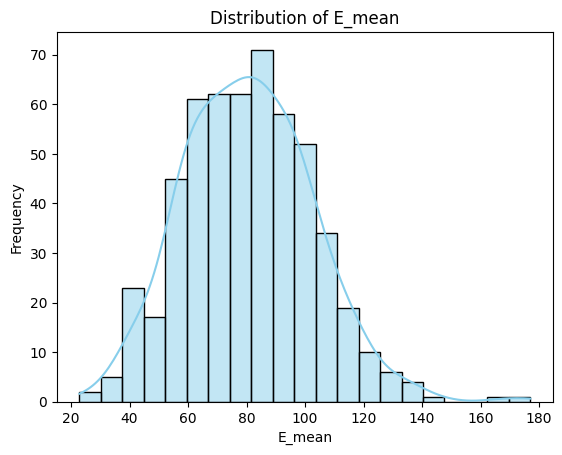

In [ ]:
# Example of visualisation
visualise_attribute('E_mean')

#### 2.4.2 Bivariate Analysis

In [ ]:
# Create a histogram to visualize the distribution
def visualise_bivariate_attributes(attribute1, attribute2):
  plt.hist(data[attribute1], bins=20, color='skyblue', alpha=0.7, label=attribute1)
  plt.hist(data[attribute2], bins=20, color='lightcoral', alpha=0.7, label=attribute2)

  plt.title('Distribution of {} and {}'.format(attribute1, attribute2))
  plt.xlabel('Values')
  plt.ylabel('Frequency')
  plt.legend()

  plt.show()

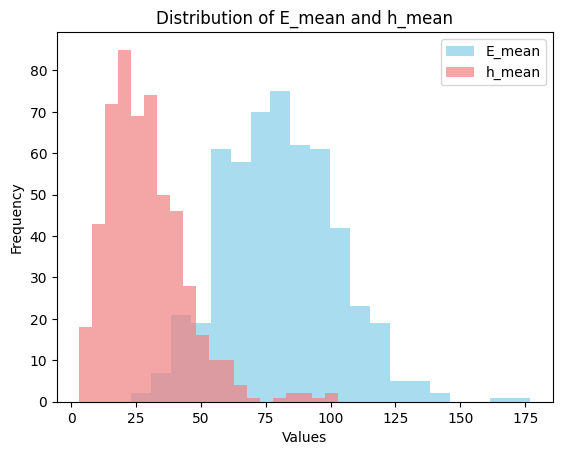

In [ ]:
# Example of visualisation
visualise_bivariate_attributes('E_mean', 'h_mean')

# 3. Data Preperation

## 3.1 Data Selection

### 3.2.1 Feature Extraction

### 3.2.2 Feature Selection

Feature Selection entails utilizing methods to select a minimal subset of features that remains adequate for effective data analysis.

#### 3.2.2.1 Remove Duplicate Rows

In [ ]:
duplicate_rows = data.duplicated()
data = data[~duplicate_rows]
print("Number of Duplicate Rows:", duplicate_rows.sum())
print("DataFrame shape after removing duplicates:", data.shape)

Number of Duplicate Rows: 0
DataFrame shape after removing duplicates: (550, 494)


#### 3.2.2.1 Remove Irrelevant Features

Remove irrelevant Meta Attributes

In [ ]:
data = data.drop(columns=['BRAND', 'AdNumber.1', 'Sponsor', 'AdTitle', 'iSpot.tv', 'Comment', 'Kelloggs', 'AdNumber.2', 'Coder', 'Year', 'h_min', 'FrameCount'])

Remove other irrelevant columns

NOTE: The super categories (settings) are removed since this information is already included in the columns (object)_count. Whereas the Speaking time in seconds is removed because it is already shown as a percentage which is better for the model.

In [ ]:
data = data.drop(columns=['super_category_person_count', 'super_category_accessory_count', 'super_category_kitchen_count', 'super_category_animal_count', 'super_category_furniture_count', 'super_category_food_count', 'super_category_electronic_count',
                          'super_category_indoor_count', 'super_category_vehicle_count', 'super_category_outdoor_count', 'super_category_sports_count', 'super_category_appliance_count', 'Total_Speaking_Time_Seconds', 'Male_Speaking_Time_Seconds', 'Female_Speaking_Time_Seconds'])

In [ ]:
prefixes_to_remove = ['bicycle', 'bus', 'train', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter',
                      'bench', 'bird', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag',
                      'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat',
                      'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'wine glass', 'cup', 'fork',
                      'knife', 'spoon', 'bowl', 'banana', 'apple', 'orange', 'broccoli', 'carrot', 'hot dog', 'cake',
                      'chair', 'couch', 'potted plant', 'bed', 'dining table', 'toilet', 'mouse', 'remote', 'microwave',
                      'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
                      'hair drier', 'toothbrush', 'motorcycle', 'airplane', 'truck', 'boat', 'sandwich', 'pizza',
                      'donut', 'tv', 'laptop', 'keyboard']

# Filtering columns that do not start with the specified prefixes
data = data.loc[:, ~data.columns.str.startswith(tuple(prefixes_to_remove))]

## 3.2 Data Cleaning


### 3.2.1 Missing Values

MCAR: do not depend on other attributes
Solution: Amputation

#### 3.2.1.1 Quarter

In [ ]:
data = data.dropna(subset=['Quarter'])
data.shape

(549, 183)

#### 3.2.1.2 Video Complexity Data

Here we can only drop the rows of one of the Columns since the empty values are the same

In [ ]:
data = data.dropna(subset=['E_mean'])
data.shape

(534, 183)

#### 3.2.1.3 Rating

In [ ]:
data = data[data['USATodayAdMeter'] != "-"]
data.shape

(533, 183)

#### 3.2.1.3 Empty Cells to Zero

In [ ]:
data.fillna(0, inplace=True)

In [ ]:
data.isnull().sum().sum()

0

## 3.5 Data Transformation and Normalization

For ordinal attributes we employed single numerical encoding since they follow a specific order.

### 3.5.1 Length

In [ ]:
new_length = data['Length'].value_counts().reset_index()
new_length.columns = ['Length', 'Count']
new_length = new_length.sort_values(by='Count', ascending=False)
new_length['Percentage'] = (new_length['Count'] / new_length['Count'].sum()) * 100

new_length

,Length,Count,Percentage
0,30,285,53.470919
1,60,180,33.771107
2,15,26,4.878049
3,45,17,3.189493
4,90,12,2.251407
5,120,7,1.313321
6,95,1,0.187617
7,103,1,0.187617
8,75,1,0.187617
9,50,1,0.187617


### 3.5.2 Quarter

NOTE: HAT and HT both mean Halftime, meaning between the second and third quarter, and PG means Pregame, which is before the first quarter.

In [ ]:
quarter_mapping = {'HAT': 2.5, 'HT': 2.5, 'PG': 0.5, 'PK':4.5}
data['Quarter'].replace(to_replace=quarter_mapping.keys(), value=quarter_mapping.values(), inplace=True)

### 3.5.3 USATodayAdMeter

In [ ]:
# Define a function to check if a value is numeric and round it
def round_if_numeric(value):
    try:
        return round(float(value))
    except ValueError:
        return value

data['USATodayAdMeter'] = data['USATodayAdMeter'].apply(round_if_numeric)

### 3.5.4 Video Complexity

#### 3.5.4.1 Spatial Complexity

In [ ]:
"""
data['E_mean'] = (data['E_mean'] - data['E_mean'].min()) / (data['E_mean'].max() - data['E_mean'].min())
data['E_std'] = (data['E_std'] - data['E_std'].min()) / (data['E_std'].max() - data['E_std'].min())
data['E_max'] = (data['E_max'] - data['E_max'].min()) / (data['E_max'].max() - data['E_max'].min())
data['E_min'] = (data['E_min'] - data['E_min'].min()) / (data['E_min'].max() - data['E_min'].min())
"""

"\ndata['E_mean'] = (data['E_mean'] - data['E_mean'].min()) / (data['E_mean'].max() - data['E_mean'].min())\ndata['E_std'] = (data['E_std'] - data['E_std'].min()) / (data['E_std'].max() - data['E_std'].min())\ndata['E_max'] = (data['E_max'] - data['E_max'].min()) / (data['E_max'].max() - data['E_max'].min())\ndata['E_min'] = (data['E_min'] - data['E_min'].min()) / (data['E_min'].max() - data['E_min'].min())\n"

#### 3.5.4.1 Tempolar Complexity

In [ ]:
"""
data['h_mean'] = (data['h_mean'] - data['h_mean'].min()) / (data['h_mean'].max() - data['h_mean'].min())
data['h_std'] = (data['h_std'] - data['h_std'].min()) / (data['h_std'].max() - data['h_std'].min())
data['h_max'] = (data['h_max'] - data['h_max'].min()) / (data['h_max'].max() - data['h_max'].min())
"""

"\ndata['h_mean'] = (data['h_mean'] - data['h_mean'].min()) / (data['h_mean'].max() - data['h_mean'].min())\ndata['h_std'] = (data['h_std'] - data['h_std'].min()) / (data['h_std'].max() - data['h_std'].min())\ndata['h_max'] = (data['h_max'] - data['h_max'].min()) / (data['h_max'].max() - data['h_max'].min())\n"

### 3.5.4 Other Attributes

In [ ]:
"""
columns_to_normalize = data.columns[60:]

for column in columns_to_normalize:
    if column != 'Emotion_from_Dialogue':
        # Calculate min and max for the current column
        min_value = data[column].min()
        max_value = data[column].max()

        # Apply min-max normalization to each cell in the column
        data[column] = data[column].apply(lambda x: (x - min_value) / (max_value - min_value))
"""

"\ncolumns_to_normalize = data.columns[60:]\n\nfor column in columns_to_normalize:\n    if column != 'Emotion_from_Dialogue':\n        # Calculate min and max for the current column\n        min_value = data[column].min()\n        max_value = data[column].max()\n\n        # Apply min-max normalization to each cell in the column\n        data[column] = data[column].apply(lambda x: (x - min_value) / (max_value - min_value))\n"

### 3.5.6 Inserting dummy variables for the non-binary Attributes

In [ ]:
data = pd.get_dummies(data, columns=['Emotion_from_Dialogue'], drop_first=True)

In [ ]:
columns_to_dummy = [col for col in data.columns if col.startswith('cont_')]

for col in columns_to_dummy:
    unique_values = data[col].unique()
    if len(unique_values) > 2 or not all(val in [0, 1] for val in unique_values):
        data = pd.get_dummies(data, columns=[col], drop_first=True)

In [ ]:
#data.to_excel('/content/drive/MyDrive/SuperBowl_Project_FUB/Colab_Notebooks/Fla_ML_Model/End_Datei_test.xlsx', index=False)

# 4. Unique Values

## 4.1 Attribute Selection

### 4.1.1 Only the manually coded attributes + Length + Quarter

In [ ]:
# Keeping only relevant attributes
manual_columns = [
    col for col in data.columns
    if col.startswith('cont_') or
    col.startswith('Length') or col.startswith('Quarter') or col.startswith('AdNumber')
]
# Create a new DataFrame with only the selected columns
data_manual = data[manual_columns]

### 4.1.2 Only the attributes created from this project

In [ ]:
# Columns to exclude
columns_to_exclude = [
    col for col in data.columns
    if col.startswith('cont_') or
    col.startswith('Length') or col.startswith('Quarter') or col.startswith('USATodayAdMeter')
]

# Create a new DataFrame excluding specified columns
data_project = data.drop(columns=columns_to_exclude)

### 4.1.3 Combination of all the attributes

In [ ]:
data = data.drop(columns=['USATodayAdMeter'])
data_all = data

## 4.2 Unique Attribute Values for the best Ads

In [ ]:
def ttest_for_unique_attributes(dataframe):
  df = dataframe.copy()

  # Filter data for specific ads
  ads_of_interest = ['AD0310', 'AD0361', 'AD0260', 'AD0608', 'AD0491', 'AD0726', 'AD0524', 'AD0651', 'AD0431', 'AD0742']
  selected_ads = df[df['AdNumber'].isin(ads_of_interest)]
  other_ads = df[~df['AdNumber'].isin(ads_of_interest)]

  # Iterate through columns and perform t-test
  for column in df.columns:
      if column != 'AdNumber':  # Skip the 'AdNumber' column
          t_statistic, p_value = ttest_ind(selected_ads[column], other_ads[column])

          # Check if p-value is less than 0.05
          if p_value < 0.05:
              print(column)

## 4.3 Results

### 4.3.1 Only the manually coded attributes + Length + Quarter

In [ ]:
ttest_for_unique_attributes(data_manual)

Length
cont_celeb_female
cont_celeb_anyfemale
cont_celeb_corporate
cont_animal
cont_animal_dog
cont_animal_other
cont_animal_any
cont_animal_dogany
cont_animal_otherany
cont_primary_product_type_2
cont_primary_product_type_7
cont_relation_latino_2


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:523: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


### 4.3.2 Only the attributes created from this project

In [ ]:
ttest_for_unique_attributes(data_project)

person_count
dog_count
dog_avg_quadrant_number
dog_frame_ratio
car_avg_object_propotion
car_avg_quadrant_number
cow_avg_object_propotion
cow_avg_quadrant_number
cow_frame_ratio
horse_count
horse_avg_object_propotion
horse_frame_ratio
cat_avg_object_propotion
cat_avg_quadrant_number
[18, 30]_count
Woman_count
sad_count
sad_avg_object_propotion
sad_avg_quadrant_number
white_avg_object_propotion
white_avg_quadrant_number
black_count
latino hispanic_count
latino hispanic_avg_quadrant_number
Female_Speaking_Time_Percent
Acoustic_Complexity_Index__main_value
compression_ratio_per_second


### 4.3.3 Combination of all the attributes

In [ ]:
ttest_for_unique_attributes(data_all)

Length
cont_celeb_female
cont_celeb_anyfemale
cont_celeb_corporate
cont_animal
cont_animal_dog
cont_animal_other
cont_animal_any
cont_animal_dogany
cont_animal_otherany
person_count
dog_count
dog_avg_quadrant_number
dog_frame_ratio
car_avg_object_propotion
car_avg_quadrant_number
cow_avg_object_propotion
cow_avg_quadrant_number
cow_frame_ratio
horse_count
horse_avg_object_propotion
horse_frame_ratio
cat_avg_object_propotion
cat_avg_quadrant_number
[18, 30]_count
Woman_count
sad_count
sad_avg_object_propotion
sad_avg_quadrant_number
white_avg_object_propotion
white_avg_quadrant_number
black_count
latino hispanic_count
latino hispanic_avg_quadrant_number
Female_Speaking_Time_Percent
Acoustic_Complexity_Index__main_value
compression_ratio_per_second
cont_primary_product_type_2
cont_primary_product_type_7
cont_relation_latino_2


# 5. Common Intervals Visualisation

In [ ]:
# Filter data for specific ads
ads_of_interest = ['AD0310', 'AD0361', 'AD0260', 'AD0608', 'AD0491', 'AD0726', 'AD0524', 'AD0651', 'AD0431', 'AD0742']
selected_ads = data[data['AdNumber'].isin(ads_of_interest)]
other_ads = data[~data['AdNumber'].isin(ads_of_interest)]

selected_ads.to_excel('/content/drive/MyDrive/SuperBowl_Project_FUB/Analyse_Top_10/End_Datei_Top_10_best.xlsx', index=False)
other_ads.to_excel('/content/drive/MyDrive/SuperBowl_Project_FUB/Analyse_Top_10/End_Datei_Top_10_rest.xlsx', index=False)

In [ ]:
def intervals_visualisation(attribute):
  # Set up the figure and number of bins
  plt.figure(figsize=(10, 6))
  num_bins = 20

  # Plot histogram for other_ads
  sns.histplot(
      other_ads[f'{attribute}'],
      bins=num_bins,
      kde=True,
      color='skyblue',
      stat='density',
      edgecolor='black',
      label='Other Ads'
  )

  # Plot histogram for selected_ads
  sns.histplot(
      selected_ads[f'{attribute}'],
      bins=num_bins,
      kde=True,
      color='salmon',
      stat='density',
      edgecolor='black',
      label='Selected Ads'
  )

  # Calculate and plot quartiles for other_ads
  quartiles_other = other_ads[f'{attribute}'].quantile([0.25, 0.5, 0.75])
  for i, (q, style, label) in enumerate(zip(quartiles_other, ['--', '-.', ':'], ['25th', 'Median', '75th'])):
      plt.axvline(q, linestyle=style, color='darkblue', linewidth=1, label=f'{label} Quartile (Other Ads)')

  # Calculate and plot quartiles for selected_ads
  quartiles_selected = selected_ads[f'{attribute}'].quantile([0.25, 0.5, 0.75])
  for i, (q, style, label) in enumerate(zip(quartiles_selected, ['--', '-.', ':'], ['25th', 'Median', '75th'])):
      plt.axvline(q, linestyle=style, color='red', linewidth=1, label=f'{label} Quartile (Selected Ads)')

  # Adding labels, title and legend
  plt.xlabel(f'{attribute}')
  plt.ylabel('Density')
  plt.title(f'Comparison of {attribute} between Other Ads and Selected Ads')
  plt.legend()
  plt.show()

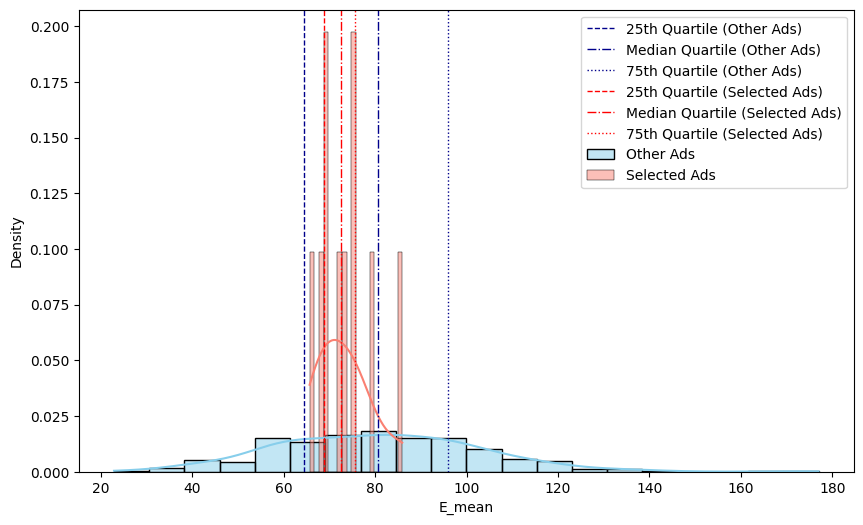

In [ ]:
intervals_visualisation('E_mean')